## GRIP: THE SPARK FOUNDATION
### DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP
### AUTHOR: Aniket Tanaji Dabade


## TASK 1: Prediction Using Supervised Machine Learning

Problem: Predict the percentage of a student based on the Number of study hours. What will be the predicted score if a student studies for 9.25 hrs per day?


#### IMPORT MODULES

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### DATA EXTRACTION & PREPARATION

In [39]:
Studentdata=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")


In [40]:
Studentdata

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [41]:
Studentdata.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
#Shape of the data set (Columns,Rows)
Studentdata.shape

(25, 2)

In [43]:
#Checking for any missing values in Studentdata
Studentdata.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [44]:
Studentdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


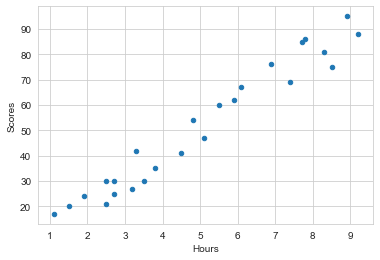

In [45]:
#Plotting Scatterplot Hours vs Scores
Studentdata.plot(kind='scatter', x='Hours', y='Scores')
plt.show()

### Correlation


In [46]:
#Find out correlation between Hours & Scores
Studentdata.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [47]:
Studentdata.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


From above both results we can conclude that relation between Hours & Scores is Linear. i.e With the increase in no. of study hours Score also increases. Correlation between two of the above variables is strongly positive.

In [48]:
Hours=Studentdata['Hours']
Scores=Studentdata['Scores']


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

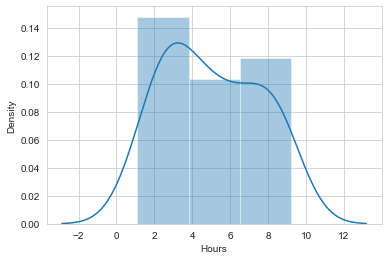

In [49]:
sns.distplot(Hours)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

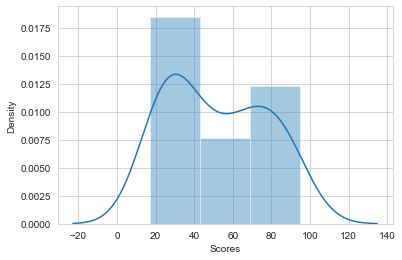

In [50]:
sns.distplot(Scores)

## LINEAR REGRESSION 

In [51]:
x=Studentdata.iloc[:,:-1].values
y=Studentdata.iloc[:,1].values

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

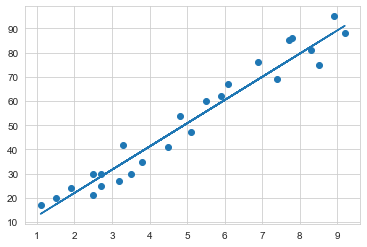

In [54]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [55]:
y_pred=reg.predict(x_test)

In [56]:
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


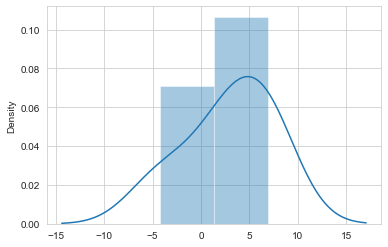

In [57]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

### Prediction of score if student studies for 9.25hrs

In [58]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exams.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exams.


#### From above result, We can conclude that, If student studies for 9.25 hrs his/her score will be 91.56986604%

## Evaluation of Model

In [59]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
